# Исследование данных сервиса аренды самокатов GoFast.

В нашем распоряжении данные сервиса GoFast, а именно информация о некоторых пользователях из нескольких городов, а также об их поездках. В ходе исследования, в первую очередь необходимо будет предобработать данные, исследовать основные факторы в данных и проверить несколько гипотез, которые серьезно могут повлиять на качество сервиса GoFast.

**Цель исследования:**
1. Определить:
- Частоту встречаемости городов. 
- Соотношение пользователей с подпиской и без подписки. 
- Возраст пользователей.
- Расстояние, которое пользователь преодолевает за одну поездку.
- Продолжительность поездок.

2. Подсчитать выручки с одного пользователя ежемесячно.


3. Проверить гипотезы:
- Тратят ли пользователи с подпиской больше времени на поездки? 
- Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?


4. Выяснить на основе экспериментов, проведенных отделом маркетинга, важную информацию:
- Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план (10%+ продления подписки) была примерно 5%?
- Вероятность того, что уведомление откроют не более 399,5 тыс. из 1 млн. пользователей?



**Ход исследования:**

1. В первую очередь, необходимо выгрузить все данные. Нам предоставляется три датафрейма: data_users - основная информация о пользователях, data_rides - информация о поездках и data_subs - основные данные о подписках.


2. Вторым действием, необходимо предобработать данные - проверка наличия пропущенных значений и дубликатов в датафреймах. Также, нужно привести столбец date к типу данных 'datetime64' и создать новый столбец с номером месяца на основе столбца date. Все предобработанные данные пригодятся в дальнейшем для исследования.


3. Третьим действием, на основе предобработанных данных, мы исследуем основную информацию о пользователях и поездках (Цель исследования, пункт №1).


4. Четвертым действием, нам необходимо объединить данные о пользователях, поездках и подписках в один датафрейм. Также, стоит создать ещё два датафрейма, в которых будут хранится данные о пользователях с подпиской и без, на основе этих датафреймов визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.


5. Пятым действием, на основе объединенных данных из пункта №4 - подсчитать выручку.


6. Шестым действием, с помощью Python проверим основные гипотезы, влияющие на качество и прибыльность продукта (На основе цели исследования - пункт №3).


7. Седьмым действиейм, с помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 
399,5 тыс. из 1 млн. пользователей.


## Шаг 1. Загрузка данных

### Загрузка датафреймов.

1. Для того, чтобы в дальнейшем взаимодействовать с данными, выгрузим модули.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

2. С помощью метода read_csv() выгрузим все нужные данные.

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subs = pd.read_csv('/datasets/subscriptions_go.csv')

#### Документация о данных из датафреймов.

1. Датафрейм **data_users** - основная информация о пользователях.
- **user_id** -	уникальный идентификатор пользователя.
- **name** -	имя пользователя.
- **age** -	возраст.
- **city** - город.
- **subscription_type** - тип подписки (free, ultra).


2. Датафрейм **data_rides** - основная информация о поездках пользователя.
- **user_id** - уникальный идентификатор пользователя.
- **distance** -	расстояние, которое пользователь проехал в текущей сессии (в метрах).
- **duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку».
- **date** - дата совершения поездки.


3. Датафрейм **data_subs** - основная информация о видах подписки.
- **subscription_type** -	тип подписки.
- **minute_price** -	стоимость одной минуты поездки по данной подписке&
- **start_ride_price** - стоимость начала поездки.
- **subscription_fee** - стоимость ежемесячного платежа

#### Основная информация о датафрейме 'data_users'.

1. Выведем первые пять и последние пять строк данного датафрейма.

In [3]:
data_users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_users.tail(5)

,user_id,name,age,city,subscription_type
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


2. С помощью метода describe() выведем основную информацию, связанную с числами вида 'int64'.

In [5]:
data_users.describe().astype('int64')

,user_id,age
count,1565,1565
mean,762,24
std,443,4
min,1,12
25%,378,22
50%,762,25
75%,1146,28
max,1534,43


3. C помощью метода info() выведем всю основную информацию о данном датафрейме.

In [6]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**Вывод:** датафрейм представляет из себя таблицу из 5 столбцов (id, имя, возраст, город, тип подписки), которая отражает основную информацию о пользователе. Мы видим, что пропусков в таблице нет (точнее мы их по этим данным не увидели, но будем проверять), типы данных выбраны правильно.

#### Основная информация о датафрейме 'data_rides'.

1. Выведем первые пять и последние пять строк данного датафрейма.

In [7]:
data_rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
data_rides.tail(5)

,user_id,distance,duration,date
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27
18067,1534,2371.711192,15.893917,2021-12-29


2. С помощью метода describe() выведем основную информацию, связанную с числами вида 'int64'.

In [9]:
data_rides.describe().astype('int64')

,user_id,distance,duration
count,18068,18068,18068
mean,842,3070,17
std,434,1116,6
min,1,0,0
25%,487,2543,13
50%,889,3133,17
75%,1213,3776,21
max,1534,7211,40


3. C помощью метода info() выведем всю основную информацию о данном датафрейме.

In [10]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**Вывод:** датафрейм представляет из себя таблицу из 4 столбцов (id, дистанция поездки, длительность поездки, дата), которая отражает основную информацию о поездках. Мы видим, что пропусков в таблице нет (точнее мы их по этим данным не увидели, но будем проверять), типы данных выбраны правильно.

#### Основная информация о датафрейме 'data_subs'.

In [11]:
data_subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод:** датафрейм представляет из себя таблицу из 4 столбцов (вид подписки, цена за минуту, стоимость начала поездки, плата за подписку) и двух строк, которые отражают два вида подписки - 'free' и 'ultra'.

## Шаг 2. Предобработка данных

### Предобработка данных в датафрейме 'data_users'. 

1. Выведем общую информацию о датафрейме.

In [12]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**2.Проведем предобработку данных столбца 'user_id'**

2.1 Выведем основную информацию данного столбца.

In [13]:
data_users['user_id'].describe()

count    1565.000000
mean      762.633866
std       443.260155
min         1.000000
25%       378.000000
50%       762.000000
75%      1146.000000
max      1534.000000
Name: user_id, dtype: float64

In [14]:
data_users['user_id'].duplicated().sum()

31

**Вывод:** по выведенным данным, мы видим, что максимальное значение в столбце - 1534, хотя в столбце всего 1565 строк. Эта таблица отражает информацию по уникальным пользователям, поэтому в данном столбце не должно быть повторов (дубликатов). Также, стоит отметить, что выбросов нет, так как мы не наблюдаем 0 или отрицательные значения - всё в норме.

2.2 Определим какие значения в столбце повторяются с помощью метода sort_values() и упорядочим по убыванию.

In [15]:
data_users['user_id'].value_counts().sort_values(ascending=False).head(35)

209     2
1237    2
807     2
204     2
403     2
422     2
16      2
809     2
297     2
108     2
666     2
121     2
1245    2
307     2
659     2
127     2
293     2
1045    2
829     2
611     2
136     2
43      2
47      2
1198    2
737     2
924     2
153     2
635     2
72      2
909     2
908     2
24      1
11      1
3       1
4       1
Name: user_id, dtype: int64

2.3 С помощью метода drop_duplicates() - удалим повторяющиеся значения.

In [16]:
data_users = data_users.drop_duplicates(subset=['user_id'])

In [17]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


**Вывод:** данные предобработаны.

**3. Проведем предобработку данных столбца 'name'**.

3.1 Столбце 'name' отражает имена пользователей. Выведем все уникальные значения этого столбца, для того, чтобы проверить нет ли неявных дубликатов.

In [18]:
data_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

**Вывод:** из выведенных данных видно, что неявных дубликатов - нет. Столбец в полном порядке.

**4. Проведем предобработку данных столбца 'age'**.

4.1 Выведем основную информацию о данном столбце с помощью метода describe().

In [19]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Вывод:** по выведенным данным видно, что данные в порядке, в 12 лет можно уже арендовывать самокаты. Отрицательных или нулевых значений - нет.

**5. Проведем предобработку данных столбца 'city'**.

5.1 Проверим есть ли неявные дубликаты в данном столбце с помощью метода unique(). 

In [20]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

**Вывод:** данные в порядке.

### Предобработка данных в датафрейме 'data_rides'.

**1. Выведем основную информацию о данном датафрейме.**

In [21]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [22]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [23]:
data_rides.duplicated().sum()

0

**Вывод:** по выведенным данным мы можем заметить, что таблица отсортирована по 'user_id' сначала идут все поездки ИДа под номером 1, потом 2 и т.д. Дубликатов не наблюдается. Дата выбрана в неправильном формате данных.

**2. Проведем предобработку данных столбца 'user_id'.**

1. Выведем основную информацию о данном столбце.

In [24]:
data_rides['user_id']

0           1
1           1
2           1
3           1
4           1
         ... 
18063    1534
18064    1534
18065    1534
18066    1534
18067    1534
Name: user_id, Length: 18068, dtype: int64

In [25]:
data_rides['user_id'].describe().astype('int64')

count    18068
mean       842
std        434
min          1
25%        487
50%        889
75%       1213
max       1534
Name: user_id, dtype: int64

**Вывод:** данный столбец корректен. 

**3. Проведем предобработку данных столбца 'distance'**.

1. Выведем основную информацию данного столбца.

In [26]:
data_rides['distance']

0        4409.919140
1        2617.592153
2         754.159807
3        2694.783254
4        4028.687306
            ...     
18063    3781.098080
18064    2840.423057
18065    3826.185507
18066    2902.308661
18067    2371.711192
Name: distance, Length: 18068, dtype: float64

In [27]:
data_rides['distance'].describe().astype('float64')

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Вывод:** по выведенным данным мы видим, что данные в порядке. Минимальное значение - ±0.85 может быть, как и максимальное - ±7211. Нулевых, пропущенных значений - нет.

**4. Проведем предобработку данных столбца 'duration'**.

1. Выведем основную информацию данного столбца.

In [28]:
data_rides['duration']

0        25.599769
1        15.816871
2         6.232113
3        18.511000
4        26.265803
           ...    
18063    19.822962
18064    21.409799
18065    18.435051
18066    16.674362
18067    15.893917
Name: duration, Length: 18068, dtype: float64

In [29]:
data_rides['duration'].describe().astype('float64')

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

**Вывод:** по выведенным данным мы видим, что данные в порядке. Минимальное значение - ±0.5 минут может быть, как и максимальное - ±40 минут. Нулевых, пропущенных значений - нет.

**5. Проведем предобработку данных столбца 'date'**.

1. Выведем основную информацию данного столбца.

In [30]:
data_rides['date']

0        2021-01-01
1        2021-01-18
2        2021-04-20
3        2021-08-11
4        2021-08-28
            ...    
18063    2021-11-04
18064    2021-11-16
18065    2021-11-18
18066    2021-11-27
18067    2021-12-29
Name: date, Length: 18068, dtype: object

**Вывод:** по выведенным данным мы видим, что тип данных - object. Его нужно изменить на 'datetime64'.

2. Изменение типа данных.

In [31]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [32]:
data_rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

3. Создадим еще один столбец в таблице с номером месяца, когда была поездка.

In [33]:
data_rides['date_month'] = data_rides['date'].dt.month

In [34]:
data_rides

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


**Вывод** в датафрейме data_rides указывается основная информация о всех поездках каждого пользователя. После предобработки данных в этой таблице все столбцы были приведены в правильный тип данных, был создан еще один столбце 'date_month' на основе столбца 'date', который показывает номер месяца, когда была совершена поездка. Все данные в датафрейме - корректны, их можно будет применять для дальнейшего анализа данных.

In [35]:
data_users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [36]:
data_rides

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


**Общий вывод по разделу:** в ходе предобработки данных всех трёх датафреймов были получены корректные данные. В датафрейме 'data_users' были удалены дубликаты из столбца 'user_id', так как в данном столбце указываются уникальные id пользователей - повторов не может быть. Столбцы name, age, city, subscription_type - были тоже проверены, но в них дубликатов, аномалий, пропусков не было обнаружено. В датафрейме 'data_rides' все столбцы были приведены в правильный тип данных, был создан еще один столбец 'date_month' на основе столбца 'date', который показывает номер месяца, когда была совершена поездка. А в датафрейме 'data_subs' - все данные были корректны, ничего не пришлось изменять.

## Шаг 3. Исследовательский анализ данных

### Исследование частоты встречаемости городов.

#### Исследование частоты встречаемости городов по количеству пользователей.

1. Создадим сводную таблицу, в которой будет подсчитано количество пользователей из разных городов.

In [37]:
city_table = pd.pivot_table(data_users,
                           index='city',
                           values='user_id',
                           aggfunc='count').sort_values(by='user_id', ascending=False)
city_table

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


2. Создадим столбчатый график для изображения частоты количества пользователей по разным городам.

Text(0.5, 1.0, 'График частоты количества пользователей по разным городам')

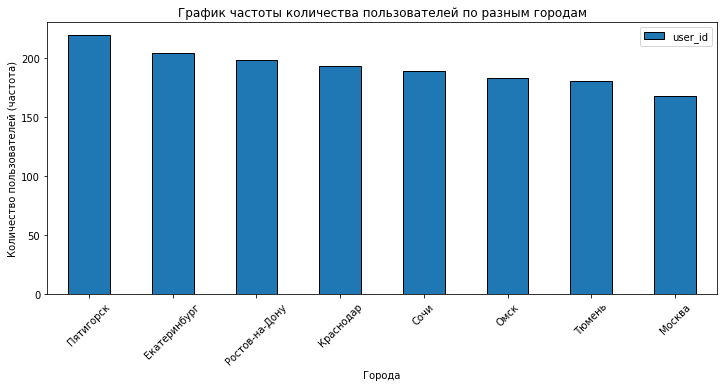

In [38]:
city_table.plot(kind='bar', rot=45, figsize=(12,5), edgecolor='black')
plt.xlabel('Города')
plt.ylabel('Количество пользователей (частота)')
plt.title('График частоты количества пользователей по разным городам')

**Вывод:** по выведенному графику видно, что большее количество пользователей в городе Пятигорск, потом идет Екатеринбург, Ростов-на-Дону. Последнее место занимает Москва.

#### Исследование частоты встречаемости городов по совершенным поездкам.

In [39]:
merged_table = pd.merge(data_users, data_rides, on='user_id')
pivot_merge_table = merged_table.pivot_table(index='city',
                        values='user_id',
                        aggfunc='count').sort_values(by='user_id', ascending=False)

Text(0.5, 1.0, 'График частоты встречаемости городов по совершенным поездкам')

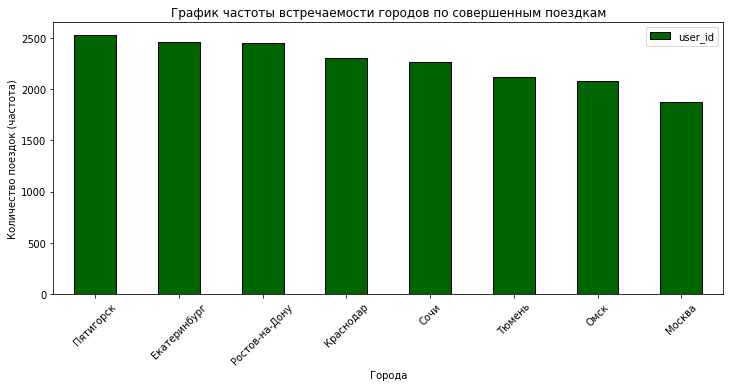

In [40]:
pivot_merge_table.plot(kind='bar', rot=45, figsize=(12,5), edgecolor='black', color='darkgreen')
plt.xlabel('Города')
plt.ylabel('Количество поездок (частота)')
plt.title('График частоты встречаемости городов по совершенным поездкам')

**Вывод:** мы видим, что графические показатели частот количества уникальных пользователей и количества поездок приблизительно похожи, выглядят одинаково. Единственное различие по месту частоты - Тюмень опередила Омск по количеству поездок.

### Исследование соотношения пользователей с подпиской и без подписки.

1. Выведем таблицу, в которой расположены нужные данные.

In [41]:
data_users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


2. Подсчитаем количество человек с подпиской и без.

In [42]:
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

3. Создадим сводную таблицу, в которой первый столбце будет названия типов подписки, а во втором столбце - количество человек по каждой подписке.

In [43]:
sub_pivot_table = pd.pivot_table(data_users,
                                index='subscription_type',
                                values='user_id',
                                aggfunc='count')
sub_pivot_table

,user_id
subscription_type,
free,835
ultra,699


4. Создадим столбчатый график.

Text(0.5, 1.0, 'Соотношения пользователей с подпиской и без подписки')

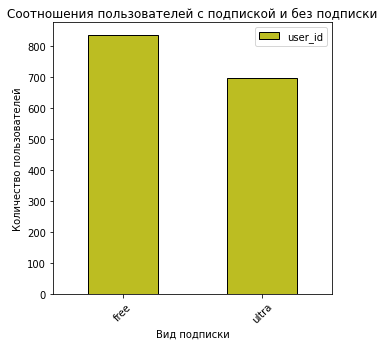

In [44]:
sub_pivot_table.plot(kind='bar', rot=45, figsize=(5,5), edgecolor='black', color='C8')
plt.xlabel('Вид подписки')
plt.ylabel('Количество пользователей')
plt.title('Соотношения пользователей с подпиской и без подписки')

**Вывод:** по столбчатому графику видно, что количество без подписки больше, но не существенно.

5. Создадим круговую диаграмму для определения процентов каждой подписки.

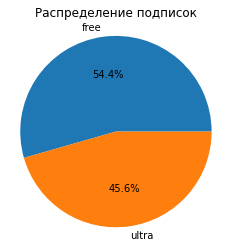

In [45]:
subscription_counts = data_users['subscription_type'].value_counts()

# Получение значений и меток
labels = subscription_counts.index
values = subscription_counts.values

# Построение графика
plt.pie(values, labels=labels, autopct='%1.1f%%', radius=1.1)
plt.title('Распределение подписок')
plt.show()

6. Определим к дополнению конверсию, какой процент от общего числа пользователей покупает подписку.

In [46]:
subscription_counts = data_users['subscription_type'].value_counts()
total_users = len(data_users)
ultra_count = subscription_counts['ultra']
conversion_rate = ultra_count / total_users
conversion_rate


0.4556714471968709

**Вывод:** по выведенным данным мы видим, что людей без подписки больше, чем с подпиской. Но хочется подметить, что у компании очень высокая конверсия, что очень хорошо.

### Исследование возраста пользователей.

1. Выведем основную информацию с помощью метода describe().

In [47]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

2. Изобразим столбчатую гистограмму с линией, которая будет показывать распределение.

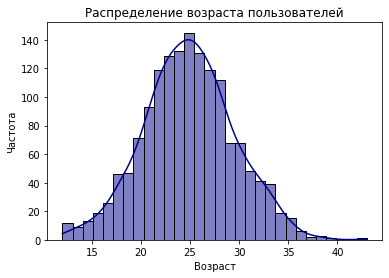

In [48]:
sns.histplot(data_users['age'], bins=30, color='darkblue', edgecolor='black', kde=True, linewidth=1)

plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста пользователей')

plt.show()


Text(0.5, 1.0, 'Ящик с усами - распределение возраста пользователей')

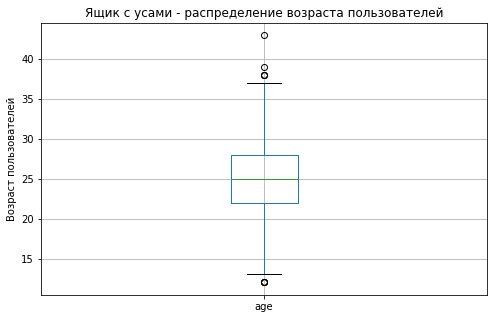

In [49]:
data_users.boxplot(column=['age'], figsize=(8,5), grid=True)
plt.ylabel('Возраст пользователей')
plt.title('Ящик с усами - распределение возраста пользователей')

**Вывод:** основная часть пользователей возрастом от 22 до 28 лет. Медиана: 25 лет. Все что меньше 15 лет и больше 40 можно считать редкими значениями.


### Исследование расстояния, которое пользователь преодолел за одну поездку.

1. Выведем основную информацию с помощью метода describe().

In [50]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

2. Изобразим столбчатую гистограмму с линией, которая будет показывать распределение.

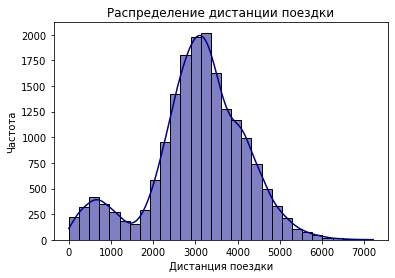

In [51]:
sns.histplot(data_rides['distance'], bins=30, color='darkblue', edgecolor='black', kde=True, linewidth=1)

plt.xlabel('Дистанция поездки')
plt.ylabel('Частота')
plt.title('Распределение дистанции поездки')

plt.show()


Text(0.5, 1.0, 'Ящик с усами - распределение дистанции пользователей')

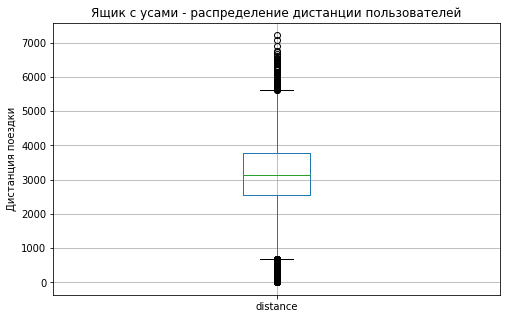

In [52]:
data_rides.boxplot(column=['distance'], figsize=(8,5), grid=True)
plt.ylabel('Дистанция поездки')
plt.title('Ящик с усами - распределение дистанции пользователей')

**Вывод:** основная часть поездок занимает от 2500 до 3800 метров. Медиана 3133 метра. Поездки на расстояние более 5 км редки. Однако на гистограмме видно, что некоторая часть пользователей использует самокаты для коротких поездок - до 1500 м.

### Исследование продолжительности поездок.

1. Выведем основную информацию с помощью метода describe().

In [53]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

2. Изобразим столбчатую гистограмму с линией, которая будет показывать распределение.

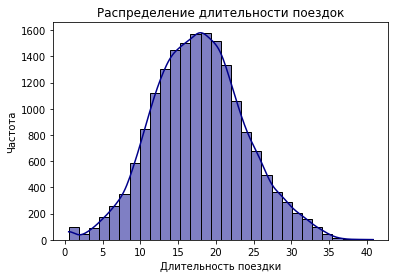

In [54]:
sns.histplot(data_rides['duration'], bins=30, color='darkblue', edgecolor='black', kde=True, linewidth=1)

plt.xlabel('Длительность поездки')
plt.ylabel('Частота')
plt.title('Распределение длительности поездок')

plt.show()

Text(0.5, 1.0, 'Ящик с усами - распределение длительности поездки в минутах')

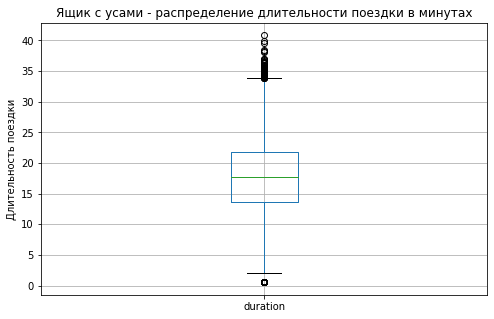

In [55]:
data_rides.boxplot(column=['duration'], figsize=(8,5), grid=True)
plt.ylabel('Длительность поездки')
plt.title('Ящик с усами - распределение длительности поездки в минутах')

**Вывод:** по выведенным данным мы можем увидеть, что средняя продолжительность поездок около 17 минут. Минимальное - меньше минуты. Максимальное затянулось на 40 минут. Также, по графику видно, что он принимает нормальное распределние.

## Шаг 4. Объединение данных

### Объединие данных о пользователях, поездках и подписках в один датафрейм.

1. Выведем оба датафрейма, которые нужно будет объединить.

In [56]:
data_users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [57]:
data_users.shape

(1534, 5)

**Размер датасета:** датафрейм 'data_users' состоит из 1534 строк и 5 столбцов. 

In [58]:
data_rides

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [59]:
data_rides.shape

(18068, 5)

**Размер датасета:** датафрейм 'data_rides' состоит из 18068 строк и 5 столбцов. 

**Вывод:** мы видим, что у обоих датафреймов есть общий столбец 'user_id', по которому мы можем их объединить.

2. С помощью метода merge() объединим оба датафрейма.

In [60]:
merged_data = pd.merge(data_users, data_rides, on='user_id')
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [61]:
merged_data.shape

(18068, 9)

**Размер объединенного датасета:** датафрейм 'merged_data' состоит из 18068 строк и 9 столбцов. 

### Создание ещё двух датафреймов - информация о пользователях с подпиской и без.

1. Необходимо объединенный датафрейм разделить еще на два датафрейма - информация о пользователях с подпиской и без.

In [62]:
sub_free = merged_data[merged_data['subscription_type'] == 'free']
sub_free

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [63]:
sub_ultra = merged_data[merged_data['subscription_type'] == 'ultra']
sub_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10


**Вывод:** по итогу мы получили две разные таблицы с общими данными о пользователях с подпиской и без, на основе которых, мы можем их сравнить. Из предложенных данных, видно, что количество пользователей без подписки гараздо больше, чем с подпиской (почти в два раза) - это стоит учесть.

### Визуализация информации о пользователях с разной подпиской.

1. Выведем оба графика, которые показывают распределение дистанции поездок с подпиской и без.

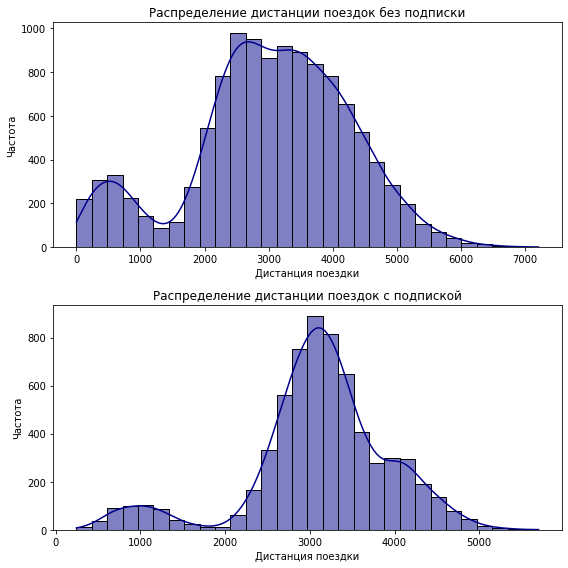

In [64]:
# Создание подуровней
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Первый график
sns.histplot(sub_free['distance'], bins=30, color='darkblue', edgecolor='black', kde=True, linewidth=1, ax=axes[0])
axes[0].set_xlabel('Дистанция поездки')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение дистанции поездок без подписки')

# Второй график
sns.histplot(sub_ultra['distance'], bins=30, color='darkblue', edgecolor='black', kde=True, linewidth=1, ax=axes[1])
axes[1].set_xlabel('Дистанция поездки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение дистанции поездок с подпиской')

# Размещение графиков
plt.tight_layout()

# Отображение фигуры
plt.show()


**Вывод:** по выведенным данным, мы можем заметить, что количество пользователей без подписки чаще ездят дальше, чем пользователи с подпиской. По графикам, также, видно, что в целом пользователи без подписки используют чаще приложение, чем пользователи с подпиской. В начале графиков мы видим, что пользователи без подписки, чаще ездят на не очень большие дистанции (менее 1 км.), чем с подпиской. Стоит подметить, что дистанция поездок дальше у пользователей без подписки (~ 7 км.), чем с подпиской (~5 км.).

2. Выведем оба графика, которые показывают распределение длительности поездок с подпиской и без.

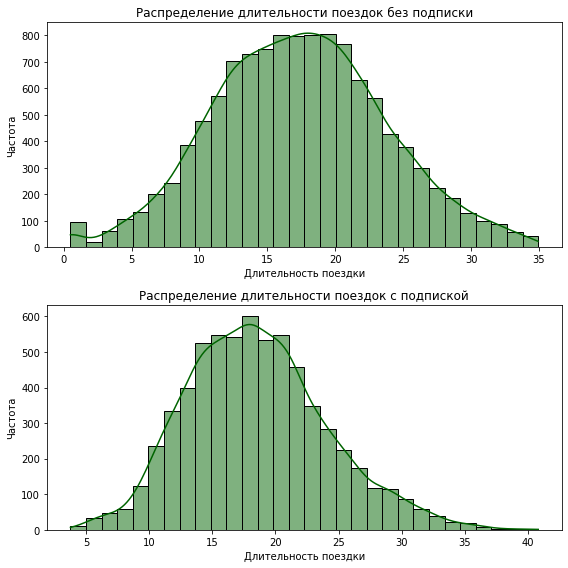

In [65]:
# Создание подуровней
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Первый график
sns.histplot(sub_free['duration'], bins=30, color='darkgreen', edgecolor='black', kde=True, linewidth=1, ax=axes[0])
axes[0].set_xlabel('Длительность поездки')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение длительности поездок без подписки')

# Второй график
sns.histplot(sub_ultra['duration'], bins=30, color='darkgreen', edgecolor='black', kde=True, linewidth=1, ax=axes[1])
axes[1].set_xlabel('Длительность поездки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение длительности поездок с подпиской')

# Размещение графиков
plt.tight_layout()

# Отображение фигуры
plt.show()


**Вывод:** В целом картина такая же - распределение внутри категорий имеют одинаковый профиль (и одинаковый с профилем распределения до разбивки на категории - строили на ранних этапах), но в каждом из диапазонов бесплатных пользователей чуть больше, но их, как мы помним, и в целом больше. Краевые значения (минимум и максимум) у бесплатных пользователей смещены влево относительно платных подписчиков - стоимость минуты все-таки больше, значит часть пользователей торопится завершить поездки за меньший срок. Но при этом визуально среднее значение не сильно смещено

## Шаг 5. Подсчёт выручки

### Создание аггрегированного датафрейма.

**Суть задания:** создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

1. Выведем объединенную таблицу, по которой будем группировать.

In [66]:
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


2. Сгруппируем верхнюю таблицу по столбцам 'user_id', 'date_month'.

In [67]:
grouped_table = merged_data.groupby(['user_id', 'date_month']).agg({'distance':'sum', 'user_id':'count', 'duration':'sum', 'subscription_type':'min'})
grouped_table = grouped_table.rename(columns={'user_id':'counts_riding'})
grouped_table.head(13)

distance  counts_riding   duration subscription_type
user_id date_month                                                          
1       1            7027.511294              2  41.416640             ultra
        4             754.159807              1   6.232113             ultra
        8            6723.470560              2  44.776802             ultra
        10           5809.911100              2  31.578017             ultra
        11           7003.499363              3  53.397424             ultra
        12           6751.629942              2  27.203912             ultra
2       3           10187.723006              3  60.959959             ultra
        4            6164.381824              2  39.048633             ultra
        6            3255.338202              1  13.851127             ultra
        7            6780.722964              2  46.170157             ultra
        8             923.007439              1   6.914760             ultra
        10           2824.636598              1  18.779128             ultra
        12           3828.248580              1  11.920514             ultra

**Вывод:** был создан датафрейм с аггрегированными данными - общая дистанция, количество поездок, длительность поездок и уровень подписки по месячно.

### Вычисление месячной выручки.

1. В первую очередь округлим значения в столбце 'duration' для дальнейшего создания нового столбца с месячной выручкой.

In [68]:
grouped_table['duration'] = np.ceil(grouped_table['duration']) 
grouped_table.head(15)

distance  counts_riding  duration subscription_type
user_id date_month                                                         
1       1            7027.511294              2      42.0             ultra
        4             754.159807              1       7.0             ultra
        8            6723.470560              2      45.0             ultra
        10           5809.911100              2      32.0             ultra
        11           7003.499363              3      54.0             ultra
        12           6751.629942              2      28.0             ultra
2       3           10187.723006              3      61.0             ultra
        4            6164.381824              2      40.0             ultra
        6            3255.338202              1      14.0             ultra
        7            6780.722964              2      47.0             ultra
        8             923.007439              1       7.0             ultra
        10           2824.636598              1      19.0             ultra
        12           3828.248580              1      12.0             ultra
3       1            3061.777147              1      13.0             ultra
        2            5421.152016              2      38.0             ultra

2. Создадим функцию 'calculate_revenue', в которой учтём стоимость одной минуты поездки по разным подпискам, стоимость платной подписки и стоимость начала сеанса поездки. После чего, с помощью метода apply() применим функцию к каждой строке таблицы.

In [69]:
def calculate_revenue(row):
    if row['subscription_type'] == 'ultra':
        return row['duration'] * 6 + 199
    elif row['subscription_type'] == 'free':
        return row['duration'] * 8 + 50
    else:
        return None

grouped_table['revenue'] = grouped_table.apply(calculate_revenue, axis=1)
grouped_table.head(15)


distance  counts_riding  duration subscription_type  \
user_id date_month                                                            
1       1            7027.511294              2      42.0             ultra   
        4             754.159807              1       7.0             ultra   
        8            6723.470560              2      45.0             ultra   
        10           5809.911100              2      32.0             ultra   
        11           7003.499363              3      54.0             ultra   
        12           6751.629942              2      28.0             ultra   
2       3           10187.723006              3      61.0             ultra   
        4            6164.381824              2      40.0             ultra   
        6            3255.338202              1      14.0             ultra   
        7            6780.722964              2      47.0             ultra   
        8             923.007439              1       7.0             ultra   
        10           2824.636598              1      19.0             ultra   
        12           3828.248580              1      12.0             ultra   
3       1            3061.777147              1      13.0             ultra   
        2            5421.152016              2      38.0             ultra   

                    revenue  
user_id date_month           
1       1             451.0  
        4             241.0  
        8             469.0  
        10            391.0  
        11            523.0  
        12            367.0  
2       3             565.0  
        4             439.0  
        6             283.0  
        7             481.0  
        8             241.0  
        10            313.0  
        12            271.0  
3       1             277.0  
        2             427.0

**Вывод:** была создана таблица с подсчётом выручки с одного пользователя за каждый месяц, когда он пользовался арендой самокатов.

## Шаг 6. Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки?

**Гипотеза:** важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

1. Для того, чтобы проверить гипотезу воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). 

In [70]:
# гипотеза H0 = пользователи с подпиской тратят также времени.
# альтернативная гипотеза H1 = пользователи с подпиской тратят больше времени.

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sub_ultra['duration'], sub_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки, чем без подписки.')
else:
    print('Не отвергаем нулевую гипотезу: пользователи с подпиской тратят меньше времени на поездки, чем без подписки.')


p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки, чем без подписки.


**Вывод:** из выведенных данных мы видим, что p-значение = ±1.28, следовательно, мы отвергаем нулевую гипотезу. Действительно, пользователи с подпиской тратят больше времени на поездки, чем без.

### Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

**Гипотеза:** расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

1. Для проведения одностороннего теста нужно использовать метод scipy.stats.ttest_1samp(), и в качестве аргумента указываем alternative='greater'.

In [71]:
# гипотеза H0 = пользователи с подпиской проезжают за одну поездку меньше 3130 метров.
# альтернативная гипотеза H1 = пользователи с подпиской проезжают больше 3130 метров.

interested_value = 3130 

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    sub_ultra['distance'], 
    interested_value,
      alternative='greater')

print('p-значение:', results.pvalue) # добавьте в аргумент p-value

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: расстояние больше 3130')
else:
    print('Не получилось отвергнуть нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.


**Вывод:** из выведенных данных мы видим, что p-значение = ~0.92, следовательно, мы не отвергаем нулевую гипотезу. Действительно, пользователи с подпиской проезжают меньше 3130 метров за одну поездку, что является оптимальным значением с точки зрения износа самоката. 

### Гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

1. Создадим отдельные датафреймы с выручкой по пользователям с подпиской и без.

In [72]:
sub_ultra_revenue = grouped_table[grouped_table['subscription_type'] == 'ultra']
sub_free_revenue = grouped_table[grouped_table['subscription_type'] == 'free']

2. Для того, чтобы проверить гипотезу воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). 

In [73]:
# гипотеза H0 = выручка с пользователей с подпиской меньше, чем с пользователей без подписки.
# альтернативная гипотеза H1 = пользователи с подпиской тратят больше времени.

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(sub_ultra_revenue['revenue'], sub_free_revenue['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: компания получает больше выручки с пользователя, у которого есть подписка, чем с пользователя, у которого её нет.')
else:
    print('Не отвергаем нулевую гипотезу: компания получает меньше выручки с пользователя по подписке, чем без.')


p-значение: 1.577594269237221e-195
Отвергаем нулевую гипотезу: компания получает больше выручки с пользователя, у которого есть подписка, чем с пользователя, у которого её нет.


**Вывод:** из выведенных данных мы видим, что p-значение = ±1.58, следовательно, мы отвергаем нулевую гипотезу. Действительно, пользователи с подпиской приносят больше выручки компании, чем пользователи без подписки. 

### Какой тест вам понадобился бы для проверки этой гипотезы?

**Суть гипотезы:** представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Выбор гипотезы:** для проверки гипотезы о том, что обновление серверов значимо снизило количество обращений в техподдержку, можно использовать статистический тест на сравнение средних значений двух выборок. В данном случае, выборки будут представлены данными о количестве обращений до обновления и после него для каждого пользователя. Тест для сравнения средних двух выборок - это t-тест Стьюдента. Для выполнения t-теста можно использовать функцию **ttest_ind** из модуля scipy.stats.

## Шаг 7. Распределения

### Нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку.

**Суть задания:** отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

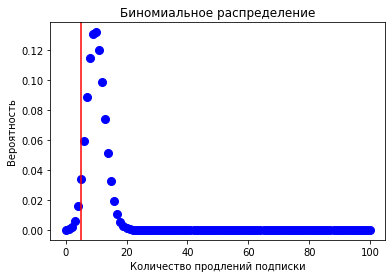

Минимальное количество промокодов: 5


In [74]:
from scipy.stats import binom

# Вероятность успеха (продления подписки)
p_success = 0.1

# Целевое количество продлений подписки
target_subscriptions = 100

# Желаемая вероятность не выполнить план
desired_probability = 0.05

# Находим минимальное количество промокодов
min_promo_codes = None
current_probability = 0

for num_codes in range(target_subscriptions + 1):
    probability = binom.pmf(num_codes, target_subscriptions, p_success)
    current_probability += probability
    if current_probability >= desired_probability:
        min_promo_codes = num_codes
        break

# Генерируем значения для графика распределения
x = range(target_subscriptions + 1)
y = binom.pmf(x, target_subscriptions, p_success)

# Построение графика распределения
plt.plot(x, y, 'bo', ms=8)
plt.xlabel('Количество продлений подписки')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение')
plt.axvline(x=min_promo_codes, color='r', linestyle='-')
plt.show()

# Вывод ответа
print("Минимальное количество промокодов:", min_promo_codes)


**Вывод:** по выведенным данным мы можем заметить, что минимум 5 промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.

### Оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей

**Суть задания:** отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открытия не более 399,5 тыс. пользователей: 0.15371708296369768


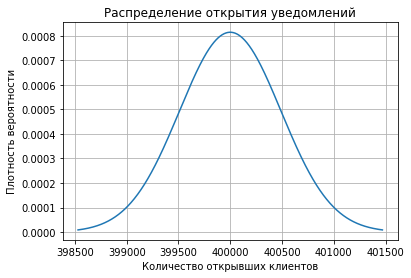

In [75]:
import scipy.stats as stats

n = 1000000
p = 0.4

mean = n * p
std_dev = (n * p * (1 - p)) ** 0.5

# Определяем нормальное распределение с указанными средним значением и стандартным отклонением
norm_dist = stats.norm(mean, std_dev)

# Оцениваем вероятность того, что количество открывших клиентов будет <= 399,5 тыс.
prob = norm_dist.cdf(399500)

print("Вероятность открытия не более 399,5 тыс. пользователей:", prob)

x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

plt.plot(x, y)
plt.xlabel('Количество открывших клиентов')
plt.ylabel('Плотность вероятности')
plt.title('Распределение открытия уведомлений')
plt.grid(True)
plt.show()

**Вывод:** по выведенным данным мы можем заметить, что вероятность того, что не более 399,5 тыс. пользователей откроют push-уведомление - 15.3%.

## Общий вывод

**1. В ходе исследования данных, связанных с сервисом GoFast была проделана большая работа:**
- В первую очередь мы предобработали все данные в исходных датафреймах. Были удалены явные дубликаты. В тех столбцах, в которых возможно, были изменены типы данных.
- Также, в датафрейм 'data_rides' был добавлен столбец 'data_month' на основе столбца 'data', который в последствии был использован для соединения двух датафреймов.


**2. Исследовательский анализ данных**
**На основе корректных данных у нас есть общее представление о пользователях и их поездках:**

- Мы смогли определить частоту встречаемости городов по количеству пользователей и сделали вывод, что большее количество пользователей в городе Пятигорск, потом идет Екатеринбург, Ростов-на-Дону. Последнее место занимает Москва. Также, была определена частота встречаемости городов по совершенным поездкам, и мы можем сделать вывод, что показатели частот количества уникальных пользователей и количества поездок приблизительно похожи, выглядят одинаково. Единственное различие по месту частоты - Тюмень опередила Омск по количеству поездок. 
- Мы определили, что людей без подписки больше, чем с подпиской.
- Основная часть пользователей возрастом от 22 до 28 лет. Медиана: 25 лет. Все что меньше 15 лет и больше 40 можно считать редкими значениями.
- Основная часть поездок занимает от 2500 до 3800 метров. Медиана 3133 метра. Поездки на расстояние более 5 км редки. Однако на гистограмме видно, что некоторая часть пользователей использует самокаты для коротких поездок - до 1500 м.
- Cредняя продолжительность поездок около 17 минут. Минимальное - меньше минуты. Максимальное затянулось на 40 минут.

**3. Объединили данные для подсчёта месячной выручки.**

**4. Подсчитали месячную выручку по каждому пользователю.**
- Получили, что в среднем пользователь с подпиской тратит: 361 руб./мес., а без подписки: 291 руб./мес. 

**5. Изучили гипотезы:**
- Пользователи с подпиской тратят больше времени на поездки, чем без.
- Пользователи с подпиской проезжают меньше 3130 метров за одну поездку, что является оптимальным значением с точки зрения износа самоката.
- Пользователи с подпиской приносят больше выручки компании, чем пользователи без подписки.

**6. Провели эксперименты и сделали выводы по ним:**
- Минимум 5 промокодов (из 100) нужно разослать, чтобы вероятность не выполнить план акции с раздачей промокодов на один бесплатный месяц подписки была примерно -  5 %.
- Вероятность того, что не более 399,5 тыс. (из 1 млн.) пользователей откроют push-уведомление - 15.3%